Enter number of points: 20


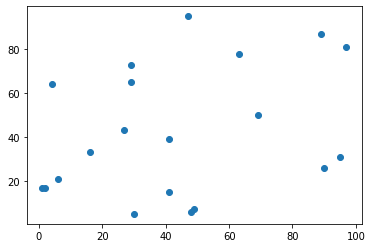

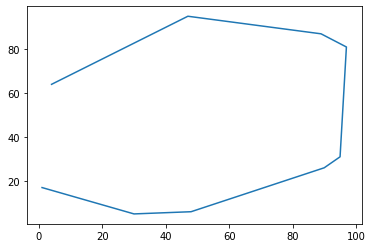

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

points = []
xcoords = []
ycoords = []

class point: 
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.polar = 0
    def __lt__(self, other):
        return self.x < other.x

def scatter(n):
    for i in range(0,n):
        point.x = np.random.randint(100)
        point.y = np.random.randint(100)
        xcoords.append(point.x)
        ycoords.append(point.y)
        points.append(point(point.x,point.y))
    plt.scatter(xcoords, ycoords)
    plt.show()

def convex_hull_graham(points):
    '''
    Returns points on convex hull in CCW order according to Graham's scan algorithm. 
    By Tom Switzer <thomas.switzer@gmail.com>.
    '''
    TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

    def cmp(a, b):
        return (a > b) - (a < b)

    def turn(p, q, r):
        return cmp((q.x - p.x)*(r.y - p.y) - (r.x - p.x)*(q.y - p.y), 0)

    def _keep_left(hull, r):
        while len(hull) > 1 and turn(hull[-2], hull[-1], r) != TURN_LEFT:
            hull.pop()
        if not len(hull) or hull[-1] != r:
            hull.append(r)
        return hull

    points = sorted(points)
    l = reduce(_keep_left, points, [])
    u = reduce(_keep_left, reversed(points), [])
    return l.extend(u[i] for i in range(1, len(u) - 1)) or l

n = int(input("Enter number of points: "))
scatter(n)
ans = convex_hull_graham(points)
axc = []
ayc = []
for obj in ans:
    axc.append(obj.x)
    ayc.append(obj.y)
plt.plot(axc, ayc)
plt.show()

## 